# Wine Quality Predictor 

Can you tell the difference between a 100 pound bottle of wine and a 5 pound one? Is there a difference between them that we can measure, could we actually predict the quality?

Here we use a dataset of vinho verde wines from Portugal. They've gathered features such as acidity, density, sugar content, and alcohol percentage for 6497 wines. Then, they brought in wine tasters to give a score from 1 to 10 on the quality of wine.

In the literature paper where the dataset is initially published, the authors used Support Vector Machines (SVM) with a Gaussian Kernal, a Neural Network with a perceptron, and a Multiple Linear Regression to predict wine quality. They found that the SVM outperformed the other two. I thought I would compare the Logistic Regression and SVM models to see which performed better on the dataset.

## Navigation

* [Data Extraction/Preparation](#first-bullet)
* [Logistic Regression model](#second-bullet)
    * [Error Analysis with Logistic Regression](#third-bullet)
    * [Precision Recall Curves](#fourth-bullet)
* [Support Vector Machines with Gaussian Kernal Model](#fifth-bullet)
* [Separating Dataset into Red and White Wines](#sixth-bullet)
* [Summary](#seventh-bullet)

## Data Extraction/Preparation <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Above we've imported the data. The columns are the features of our model. The last column is the target, quality.

Below we will turn the "type" column into a binary classifier column which we will call colour. If the type is "red" then the colour will be 1, if "white" then 0.

In [3]:
data.loc[:,'color'] = np.where(data['type'] != 'white', 1, 0)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


We will drop the type feature now that we have the binary classifier which is easier to work with. We will also drop any instances for which there is missing data.

In [4]:
data.drop('type', axis = 1, inplace = True)

In [5]:
data.isna().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
color                    0
dtype: int64

In [6]:
data.dropna(inplace = True, axis = 0)
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Logistic regression, like many machine learning models, requires the features to be scaled. We will apply mean normalisation so the features are the same order of magnitude.

In [7]:
mean = data.mean()
stdev = data.std()

FSdata = (data - mean) / stdev

In [8]:
print('min value: ', "\n", "\n", FSdata.min(),"\n", "\n", 'max value', "\n", "\n", FSdata.max())

min value:  
 
 fixed acidity          -2.633270
volatile acidity       -1.576715
citric acid            -2.194510
residual sugar         -1.018312
chlorides              -1.341551
free sulfur dioxide    -1.662097
total sulfur dioxide   -1.940577
density                -2.528009
pH                     -3.101975
sulphates              -2.089467
alcohol                -2.089319
quality                -3.227471
color                  -0.571886
dtype: float64 
 
 max value 
 
 fixed acidity            6.689389
volatile acidity         7.534114
citric acid              9.233882
residual sugar          12.688233
chlorides               15.821267
free sulfur dioxide     14.555201
total sulfur dioxide     5.737206
density                 14.753675
pH                       4.927908
sulphates                9.863789
alcohol                  3.693798
quality                  3.643130
color                    1.748328
dtype: float64


In [9]:
mean

fixed acidity             7.217755
volatile acidity          0.339589
citric acid               0.318758
residual sugar            5.443958
chlorides                 0.056056
free sulfur dioxide      30.516865
total sulfur dioxide    115.694492
density                   0.994698
pH                        3.218332
sulphates                 0.531150
alcohol                  10.492825
quality                   5.818505
color                     0.246480
dtype: float64

Whoops, we don't want to transform the quality column. Let's undo that.

In [10]:
FSdata['quality'] = (FSdata['quality'] * stdev['quality']) + mean['quality']

In [11]:
FSdata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.167773,-0.422677,0.283937,3.207172,-0.315203,0.815546,0.960705,2.099764,-1.359055,-0.544945,-1.418813,6.0,-0.571886
1,-0.707100,-0.240460,0.146245,-0.808089,-0.201165,-0.930066,0.288457,-0.232447,0.508360,-0.276333,-0.832120,6.0,-0.571886
2,0.679741,-0.361938,0.559320,0.306094,-0.172655,-0.029105,-0.330719,0.134043,0.259371,-0.612098,-0.329240,6.0,-0.571886
3,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,6.0,-0.571886
4,-0.013680,-0.665632,0.008554,0.642451,0.055422,0.928166,1.243757,0.300630,-0.176359,-0.880711,-0.496866,6.0,-0.571886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.321867,1.703183,-1.643744,-0.745022,0.340519,-0.141725,-1.374473,0.603817,1.255326,1.939720,-0.832120,6.0,1.748328
6492,-0.784147,1.581706,-1.643744,-0.723999,0.967732,0.083515,-1.268329,0.067408,1.442067,0.328046,0.006013,5.0,1.748328
6494,-0.707100,1.035056,-1.299515,-0.660933,0.568596,-0.085415,-1.339092,0.347274,1.255326,1.469649,0.425080,6.0,1.748328
6495,-1.015288,1.855030,-1.368361,-0.723999,0.540087,0.083515,-1.268329,0.257317,2.189033,1.201036,-0.245427,5.0,1.748328


In [12]:
FSdata.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
quality,,,,,,,,,,,,
3.0,30,30,30,30,30,30,30,30,30,30,30,30
4.0,214,214,214,214,214,214,214,214,214,214,214,214
5.0,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
6.0,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820,2820
7.0,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074
8.0,192,192,192,192,192,192,192,192,192,192,192,192
9.0,5,5,5,5,5,5,5,5,5,5,5,5


Let's make a function that will make training, cross validation, and test sets when we need it to. It will generate the corresponding X and y matrices for each to feed our models.

In [16]:
def makeTrainCrossValTestSet(data, train_len):
    Xcolumns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
    trainCutoff = train_len
    trainX = data.loc[0:trainCutoff, Xcolumns]
    trainY = data.loc[0:trainCutoff, 'quality']
    CVCutoff = round(len(data)*0.8)
    CVX = data.loc[(round(len(data)*0.6) + 1):(CVCutoff - 1), Xcolumns]
    CVY = data.loc[(round(len(data)*0.6) + 1):(CVCutoff - 1), 'quality']
    testX = data.loc[CVCutoff:, Xcolumns]
    testY = data.loc[CVCutoff:, 'quality']
    return trainX, trainY, CVX, CVY, testX, testY

## Logistic Regression <a class="anchor" id="second-bullet"></a>

Now let's actually put the data into a logistic regression, one versus all model.

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
FSdata = FSdata.sample(frac = 1, random_state = 2)
FSdata.reset_index(inplace = True, drop = True)

trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(FSdata, round(len(data)*0.6))

In [52]:
log_reg = LogisticRegression(multi_class = 'ovr', max_iter = 500, solver = 'lbfgs', random_state = 4)
log_reg.fit(trainX, trainY)

LogisticRegression(max_iter=500, multi_class='ovr', random_state=4)

In [53]:
trainY_predict = log_reg.predict_proba(trainX)
CVY_predict = log_reg.predict_proba(CVX)

Let's have a look at the predictions made by our model for the cross validation set. We will make it into a Pandas DataFrame then give it columns corresponding to the wine quality classes 3-9. It gives us the probability that it is that class. Next, I write some code to assign the instance with the highest probablility that predicted class.

In [54]:
prediction = pd.DataFrame(CVY_predict)
prediction.columns = ['3', '4', '5', '6', '7', '8', '9']
prediction

,3,4,5,6,7,8,9
0,0.001111,0.004533,0.261738,0.580685,0.141156,0.010732,4.540722e-05
1,0.000889,0.001721,0.147666,0.589554,0.247907,0.012225,3.685288e-05
2,0.010808,0.009954,0.376165,0.472285,0.114823,0.015742,2.228013e-04
3,0.004851,0.002023,0.862709,0.128674,0.001682,0.000061,3.161277e-10
4,0.004672,0.001347,0.094886,0.480612,0.332102,0.086015,3.668705e-04
...,...,...,...,...,...,...,...
1286,0.002683,0.009103,0.468690,0.459980,0.050932,0.008610,2.597683e-06
1287,0.000452,0.003730,0.141915,0.532273,0.299884,0.021413,3.317493e-04
1288,0.008175,0.011383,0.446167,0.464878,0.059582,0.009789,2.567336e-05
1289,0.002019,0.046101,0.296233,0.452941,0.177199,0.025407,9.883027e-05


In [55]:
prediction = prediction.idxmax(axis = 1)

Text(0, 0.5, 'predicted class')

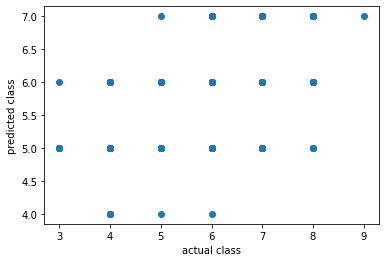

In [56]:
prediction = prediction.astype('int')
plt.scatter(CVY, prediction) #visualise the data
plt.xlabel('actual class')
plt.ylabel('predicted class')

### Error Analysis <a class="anchor" id="third-bullet"></a>

First, we need to classify the predicted class as correct or incorrect.

In [57]:
CVY.reset_index(drop= True, inplace = True)
prediction = prediction.astype("float64")
error = CVY - prediction

result = np.where(error != 0, 'correct', 'incorrect')
result = pd.DataFrame(result)

In [58]:
result

,0
0,incorrect
1,incorrect
2,incorrect
3,correct
4,incorrect
...,...
1286,correct
1287,incorrect
1288,correct
1289,incorrect


In [59]:
result.describe()

,0
count,1291
unique,2
top,incorrect
freq,686


In [60]:
#calculate precision and recall for cross validation set with a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

A confusion matrix shows us which classes are correctly/incorrectly predicted. Each row represents an actual class, and the column represents a predicted class. The index/columns are 3, 4, 5, 6, 7, 8, 9 for quality. For example, in the third row, there were 230 wines correctly assigned to quality = 5. These are true positives. There were 173 wines incorrectly assigned to quality = 6, 1 to quality = 7, and 1 to quality = 4 by the model that were actually quality = 5. This makes for 175 false negatives for quality = 5. There were 4+15+141+15+3= 178 false positives for quality = 5 (was actually quality = 5). True negatives for quality = 5 is the summation of all other fields in the confusion table that are not in the 3rd column or row (708). They were not predicted to be quality = 5 and they were not actually quality = 5. 

In summary for actual class wine quality = 5:
True positives: 230
False negatives: 175
False positives: 178
True negatives: 708

In [61]:
conf_mat = confusion_matrix(CVY, prediction)
print(conf_mat)

[[  0   0   4   1   0   0   0]
 [  0   4  15  15   0   0   0]
 [  0   1 230 173   1   0   0]
 [  0   1 141 425  21   0   0]
 [  0   0  15 178  27   0   0]
 [  0   0   3  26   9   0   0]
 [  0   0   0   0   1   0   0]]


Precision and recall are error metrics in classification. Precision focuses on whether the model prediction is right or not. Whereas recall tests the sensitivity of the model. Precision may be higher if we simplify the model to always predicting wine quality will be 6, regardless of any information about the wine. However, the recall would be poor. It is about crafting and tweaking the model to balance both precision and recall scores.

Precision = True positives / (True positives + False positives)

Recall = True positives / (True positives + False negatives)

for wine quality = 5:
Precision = 0.56
Recall = 0.57

We can use the sci-kit learn library to calculate a precision and recall score for our multiclass cross validation set.

In [65]:
precision_score(CVY, prediction, average = 'micro')

0.5313710302091402

In [66]:
recall_score(CVY, prediction, average = 'micro')

0.5313710302091402

In [67]:
f1_score(CVY, prediction, average = 'micro')

0.5313710302091402

### Precision Recall Curves <a class="anchor" id="fourth-bullet"></a>

Let's create a precision versus recall curve to see how the two are related for each of our classes. Let's do it for the training set which we haven't looked at yet but already made predictions for after fitting our model.

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

In [38]:
trainY_predict

array([[3.76809888e-04, 3.94368500e-03, 1.46637300e-01, ...,
        2.67487172e-01, 2.55505088e-02, 2.21948309e-04],
       [3.27620839e-03, 2.00910486e-02, 1.71111802e-01, ...,
        2.07414996e-01, 2.08302264e-02, 7.60872654e-04],
       [2.69964652e-03, 8.59200733e-03, 5.41160710e-01, ...,
        3.91125631e-02, 6.81733847e-03, 8.34635569e-05],
       ...,
       [2.90564763e-03, 2.80926153e-02, 5.04811062e-01, ...,
        4.48353461e-02, 4.83108901e-03, 8.07292604e-05],
       [3.16091074e-03, 1.22234426e-02, 3.30930953e-01, ...,
        1.13571091e-01, 1.70562779e-02, 1.66077110e-04],
       [8.39404802e-04, 1.73567266e-02, 3.42729209e-01, ...,
        9.57435643e-02, 1.09767099e-02, 1.09867566e-04]])

We need to transform the actual class array to one-versus all to make it the same shape as the predictions. We will use the label binaarizer in sci-kit learn for this.

In [39]:
lb = preprocessing.LabelBinarizer()
lb.fit(CVY)

LabelBinarizer()

In [40]:
lb.classes_

array([3., 4., 5., 6., 7., 8., 9.])

In [41]:
CVY_OvA = lb.transform(CVY)

In [42]:
trainY_OvA = lb.transform(trainY)

In [43]:
from sklearn.model_selection import cross_val_predict

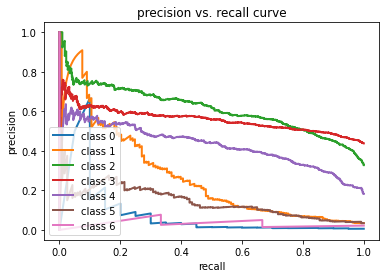

In [61]:
precision = dict()
recall = dict()

for i in range(7):
    precision[i], recall[i], _ = precision_recall_curve(trainY_OvA[:, i], trainY_predict[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

the F1 score incorporates both precision and recall giving us a good "metric" for our model.

F1 score = 2 * precision * recall / (precision + recall) = 2 * 0.56 * 0.57 / (0.56 + 0.57) = 0.56

Next we can adjust the thresold of probablility for which we assign each wine quality.

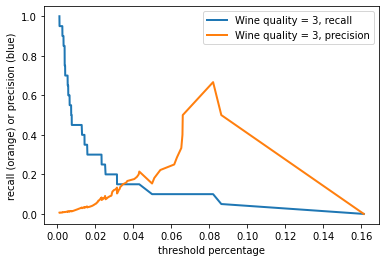

In [63]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 0], trainY_predict[:, 0])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 3, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 3, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

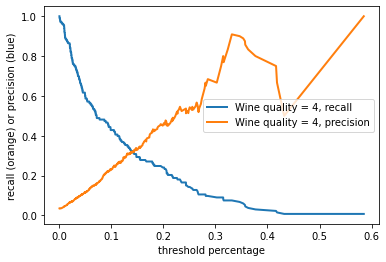

In [64]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 1], trainY_predict[:, 1])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 4, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 4, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

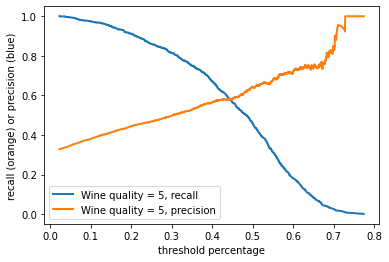

In [65]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 2], trainY_predict[:, 2])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 5, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 5, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

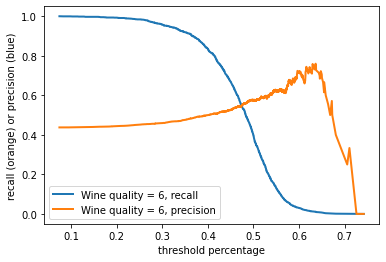

In [66]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 3], trainY_predict[:, 3])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 6, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 6, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

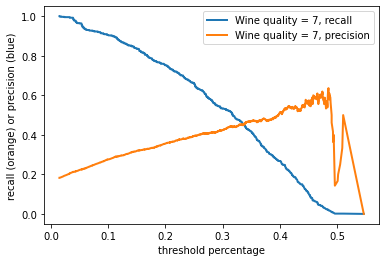

In [67]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 4], trainY_predict[:, 4])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 7, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 7, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

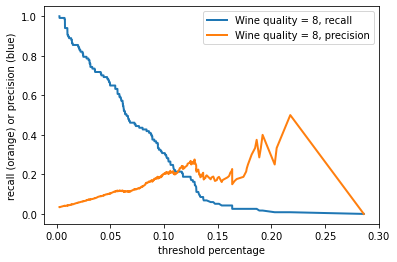

In [68]:
precision, recall, threshold = precision_recall_curve(trainY_OvA[:, 5], trainY_predict[:, 5])
plt.plot(threshold, recall[:-1], lw=2, label='Wine quality = 8, recall')
plt.plot(threshold, precision[:-1], lw=2, label='Wine quality = 8, precision')
plt.xlabel("threshold percentage")
plt.ylabel("recall (orange) or precision (blue)")
plt.legend(loc="best")
plt.show()

## Support Vector Machines <a class="anchor" id="fifth-bullet"></a>

Let's now make a Support Vector Machines model to see how well it predicts wine quality in comparison. Through sci-kit learn's preprocessing library we can scale the data using StandardScaler instead of mean normalising the data ourselves. Then we will input that data into an SVM with a Guassian Kernel.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [70]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [183]:
trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(data, round(len(data)*0.6))

In [143]:
rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 1, random_state = 25))])
rbf_kernel_svm_clf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, gamma=5, random_state=25))])

In [144]:
train_predict_svm = rbf_kernel_svm_clf.predict(trainX)

In [145]:
train_predict_svm

array([6, 6, 6, ..., 5, 5, 5], dtype=int64)

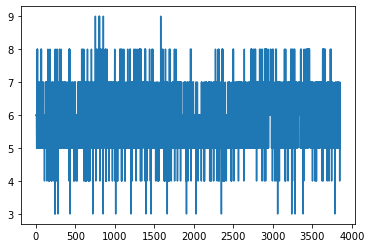

In [146]:
plt.plot(train_predict_svm)

In [147]:
conf_mat_svm = confusion_matrix(trainY, train_predict_svm)
print(conf_mat_svm)

[[  19    0    0    0    0    0    0]
 [   0  132    1    2    0    0    0]
 [   0    0 1164   12    0    0    0]
 [   0    0    4 1646    0    0    0]
 [   0    0    0    4  710    0    0]
 [   0    0    0    1    0  153    0]
 [   0    0    0    0    0    0    5]]


In [148]:
precision_score(trainY, train_predict_svm, average = 'micro')

0.9937710874643135

In [149]:
recall_score(trainY, train_predict_svm, average = 'micro')

0.9937710874643135

So precision and recall are both 0.994 for our SVM, very high! Much higher than the logistic regression model. 

But this is just for the training set. How does it generalise to our cross validation set?

In [150]:
CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)

In [151]:
confusion_matrix(CVY, CV_predict_svm)

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,   0,  42,   0,   0],
       [  0,   0,   0, 432,   0,   0],
       [  0,   0,   2, 614,   0,   0],
       [  0,   0,   0, 175,   2,   0],
       [  0,   0,   0,  21,   0,   0]], dtype=int64)

In [152]:
precision_score(CVY, CV_predict_svm, average = 'micro')

0.4778898370830101

In [153]:
recall_score(CVY, CV_predict_svm, average = 'micro')

0.4778898370830101

This shows that our model does not generalise well, it is actually lower than our logistic regression model. 

We are overfitting our model-- there is high variance such that the model exactly fits the training set. The easiest way to reduce overfitting and increasing regularization is to decrease C or gamma.

Let's vary the hyperparameters to get the maximal F1 score.

In [154]:
g = [0.0001, 0.0005, 0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
C_hyper = [0.1, 0.5, 0.1, 0.5, 1, 5, 10, 50, 100]
values = np.array([])

for i in g:
    for e in C_hyper:
        rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = i, C = e, random_state = 2))])
        rbf_kernel_svm_clf.fit(trainX, trainY)
        train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
        CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
        precision_train = precision_score(trainY, train_predict_svm, average = 'micro')
        precision_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        recall_train = precision_score(trainY, train_predict_svm, average = 'micro')
        recall_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        temp_values = [i, e, precision_train, precision_CV, recall_train, recall_CV]
        values = np.append(values, [temp_values])

In [155]:
values = values.reshape(-1,6)

Text(0, 0.5, 'training f1 score')

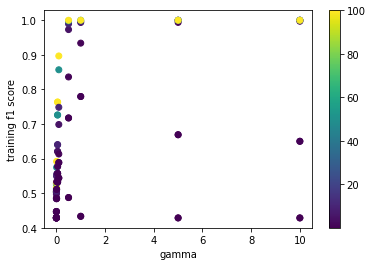

In [156]:
fScoreTrain = ((2*values[:,2]*values[:,4])/(values[:,2] + values[:,4]))
fScoreCrossVal = ((2*values[:,3]*values[:,5])/(values[:,3] + values[:,5]))

plt.scatter(values[:,0], fScoreTrain, c = values[:,1])
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('training f1 score')

Text(0, 0.5, 'cross val f1 score')

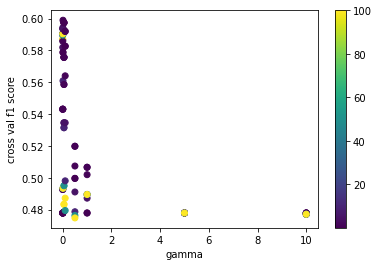

In [157]:
plt.scatter(values[:,0], fScoreCrossVal, c = values[:,1])
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('cross val f1 score')

The highest f1 score for the cross validation set is from a low gamma and C.

In [158]:
values

array([[1.00000000e-04, 1.00000000e-01, 4.28237737e-01, 4.77889837e-01,
        4.28237737e-01, 4.77889837e-01],
       [1.00000000e-04, 5.00000000e-01, 4.28237737e-01, 4.77889837e-01,
        4.28237737e-01, 4.77889837e-01],
       [1.00000000e-04, 1.00000000e-01, 4.28237737e-01, 4.77889837e-01,
        4.28237737e-01, 4.77889837e-01],
       [1.00000000e-04, 5.00000000e-01, 4.28237737e-01, 4.77889837e-01,
        4.28237737e-01, 4.77889837e-01],
       [1.00000000e-04, 1.00000000e+00, 4.28237737e-01, 4.77889837e-01,
        4.28237737e-01, 4.77889837e-01],
       [1.00000000e-04, 5.00000000e+00, 4.45626784e-01, 5.43056633e-01,
        4.45626784e-01, 5.43056633e-01],
       [1.00000000e-04, 1.00000000e+01, 4.83778874e-01, 5.86501164e-01,
        4.83778874e-01, 5.86501164e-01],
       [1.00000000e-04, 5.00000000e+01, 5.03763301e-01, 5.90380140e-01,
        5.03763301e-01, 5.90380140e-01],
       [1.00000000e-04, 1.00000000e+02, 5.04541915e-01, 5.90380140e-01,
        5.04541915e-01, 

A gamma and c that gives a decent F1 score for the cross validation set is 0.05 and 1, respectively.

In [167]:
rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 0.1, C = 0.5, random_state = 2))])
rbf_kernel_svm_clf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.5, gamma=0.1, random_state=2))])

In [168]:
rbf_kernel_svm_clf.fit(trainX, trainY)
train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
precision_train = precision_score(trainY, train_predict_svm, average = 'micro')
precision_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
recall_train = precision_score(trainY, train_predict_svm, average = 'micro')
recall_CV = precision_score(CVY, CV_predict_svm, average = 'micro')

fScoreTrain = ((2*precision_train*recall_train)/(precision_train+recall_train))
fScoreCrossVal = ((2*precision_CV*recall_CV)/(precision_CV+recall_CV))

print(fScoreTrain, fScoreCrossVal)

0.5989166881609492 0.5538342370255616


The F1 score for the cross validation set is 0.55, similar to the logistic regression model. Also, the model now predicts quality = 7 for some wines!

In [169]:
confusion_matrix(CVY, CV_predict_svm)

array([[  0,   0,   5,   0,   0,   0,   0],
       [  0,   0,  18,  16,   0,   0,   0],
       [  0,   0, 250, 155,   0,   0,   0],
       [  0,   0, 136, 419,  33,   0,   0],
       [  0,   0,   6, 168,  46,   0,   0],
       [  0,   0,   1,  25,  12,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)


|predicted class | precision | recall |
| --- | --- | --- |
| 3 | undefined | 0 |
| 4 | undefined | 0 |
| 5 | 0.60 | 0.62 |
| 6 | 0.53 | 0.71 |
| 7 | 0.5 | 0.21 |
| 8 | undefined | 0 |


The question is-- does our model suffer from high bias or variance? Let's plot a learning curve to find out.

In [19]:
from sklearn.metrics import f1_score

In [165]:
learning_curve_data = pd.DataFrame()

for iter in list(range(10, 3877)):   
    data_shuffle = data.sample(frac = 1, random_state = 2)
    data_shuffle.reset_index(inplace = True, drop = True)
    trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(data_shuffle, iter)
    rbf_kernel_svm_clf.fit(trainX, trainY)
    train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
    CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
    f1Score_train = f1_score(trainY, train_predict_svm, average = 'micro')
    f1Score_CV = f1_score(CVY, CV_predict_svm, average = 'micro')
    learning_curve_data = learning_curve_data.append([iter, f1Score_train,  f1Score_CV], ignore_index = True)

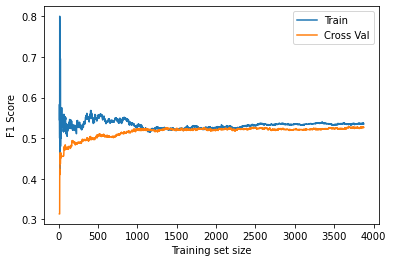

In [166]:
learning_curve_data = learning_curve_data.to_numpy()
learning_curve_data = learning_curve_data.reshape((-1,3))

plt.plot(learning_curve_data[:,0], learning_curve_data[:,1], label = 'Train')
plt.plot(learning_curve_data[:,0], learning_curve_data[:,2], label = 'Cross Val')
plt.xlabel('Training set size')
plt.ylabel('F1 Score')
plt.legend(loc = 'best')

This learning curve shows that our model is hindered by high bias rather than variance. Increasing the training set will not help, because after just 1000 training examples the f1 score of the cross validation set matches that of the training set.

However, we could choose different hyperparameters to yield a high variance model. Gamma = 0.1, C= 50 gives us a precision test set score of 0.86 and CV precision score of 0.48. We don't want to choose the hyperparameters that allow us to fit the training data perfectly (1), though. Let's make a learning curve for this model to see the difference.

In [184]:
rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 0.1, C = 50, random_state = 2))])
rbf_kernel_svm_clf.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=50, gamma=0.1, random_state=2))])

In [185]:
learning_curve_data = pd.DataFrame()

for iter in list(range(10, 3877)):   
    data_shuffle = data.sample(frac = 1, random_state = 2)
    data_shuffle.reset_index(inplace = True, drop = True)
    trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(data_shuffle, iter)
    rbf_kernel_svm_clf.fit(trainX, trainY)
    train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
    CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
    f1Score_train = f1_score(trainY, train_predict_svm, average = 'micro')
    f1Score_CV = f1_score(CVY, CV_predict_svm, average = 'micro')
    learning_curve_data = learning_curve_data.append([iter, f1Score_train,  f1Score_CV], ignore_index = True)

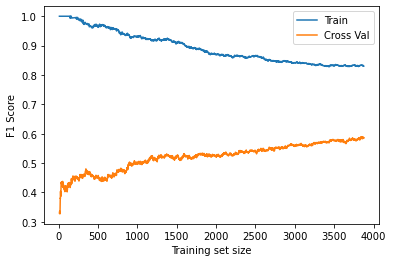

In [186]:
learning_curve_data = learning_curve_data.to_numpy()
learning_curve_data = learning_curve_data.reshape((-1,3))

plt.plot(learning_curve_data[:,0], learning_curve_data[:,1], label = 'Train')
plt.plot(learning_curve_data[:,0], learning_curve_data[:,2], label = 'Cross Val')
plt.xlabel('Training set size')
plt.ylabel('F1 Score')
plt.legend(loc = 'best')

The above learning curve is indicative of a high variance model. If we increase the training set size, the cross validation set F1 score will increase. We would choose these hyperparameters if we were able to get more data. This model has the potential to increase the cross validation F1 score to > 0.7!

In the literature paper, they actually have separate models evaluating quality for white and red wines. It could be that some of the features correlate more or less for red/white wines.

## Separating Dataset into Red and White wines <a class="anchor" id="sixth-bullet"></a>

They mention in the literature paper that there are different taste testers for the wine. Beyond this, what if whites are higher quality if they have a different pH than reds? The optimal levels of features may be different for red and white varieties. In this section we split them up to see if this makes for a better performing model.

In [41]:
reds = data.loc[:,'color'] == 1
reds = data[reds]
reds.reset_index(inplace = True)

In [25]:
whites = data.loc[:,'color'] == 0
whites = data[whites]
whites

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,0
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [26]:
trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(whites, round(len(whites)*0.6))

In [21]:
rbf_kernel_svm_whites = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 0.5, C = 0.1))])
rbf_kernel_svm_whites.fit(trainX, trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.1, gamma=0.5))])

In [22]:
train_predict_svm_whites = rbf_kernel_svm_whites.predict(trainX)
CV_predict_svm_whites = rbf_kernel_svm_whites.predict(CVX)
precision_train_whites = precision_score(trainY, train_predict_svm_whites, average = 'micro')
precision_CV_whites = precision_score(CVY, CV_predict_svm_whites, average = 'micro')

print(precision_train_whites, precision_CV_whites)

0.474283741801864 0.47070914696813976


Let's tune the hyperparameters again for the white wine model.

In [23]:
g = [0.0001, 0.0005, 0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
C_hyper = [0.1, 0.5, 0.1, 0.5, 1, 5, 10, 50, 100]
values = np.array([])

for i in g:
    for e in C_hyper:
        rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = i, C = e, random_state = 2))])
        rbf_kernel_svm_clf.fit(trainX, trainY)
        train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
        CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
        precision_train = precision_score(trainY, train_predict_svm, average = 'micro')
        precision_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        recall_train = precision_score(trainY, train_predict_svm, average = 'micro')
        recall_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        temp_values = [i, e, precision_train, precision_CV, recall_train, recall_CV]
        values = np.append(values, [temp_values])

In [27]:
values.reshape((-1,6))

array([[1.00000000e-04, 1.00000000e-01, 4.17328271e-01, 4.65570401e-01,
        4.17328271e-01, 4.65570401e-01],
       [1.00000000e-04, 5.00000000e-01, 4.17328271e-01, 4.65570401e-01,
        4.17328271e-01, 4.65570401e-01],
       [1.00000000e-04, 1.00000000e-01, 4.17328271e-01, 4.65570401e-01,
        4.17328271e-01, 4.65570401e-01],
       [1.00000000e-04, 5.00000000e-01, 4.17328271e-01, 4.65570401e-01,
        4.17328271e-01, 4.65570401e-01],
       [1.00000000e-04, 1.00000000e+00, 4.17328271e-01, 4.65570401e-01,
        4.17328271e-01, 4.65570401e-01],
       [1.00000000e-04, 5.00000000e+00, 4.69105972e-01, 4.80986639e-01,
        4.69105972e-01, 4.80986639e-01],
       [1.00000000e-04, 1.00000000e+01, 4.94994822e-01, 4.72764645e-01,
        4.94994822e-01, 4.72764645e-01],
       [1.00000000e-04, 5.00000000e+01, 5.02588885e-01, 4.66598150e-01,
        5.02588885e-01, 4.66598150e-01],
       [1.00000000e-04, 1.00000000e+02, 5.03279254e-01, 4.74820144e-01,
        5.03279254e-01, 

Gamma = 0.001 and c = 50 would give us better results. A precision test set score of 5.28 and precision cross validation score of 5.20.

In [28]:
rbf_kernel_svm_whites = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 0.001, C = 50))])
rbf_kernel_svm_whites.fit(trainX, trainY)

train_predict_svm = rbf_kernel_svm_whites.predict(trainX)
CV_predict_svm = rbf_kernel_svm_whites.predict(CVX)
precision_train = precision_score(trainY, train_predict_svm, average = 'micro')
precision_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
recall_train = precision_score(trainY, train_predict_svm, average = 'micro')
recall_CV = precision_score(CVY, CV_predict_svm, average = 'micro')

fScoreTrain = ((2*precision_train*recall_train)/(precision_train+recall_train))
fScoreCrossVal = ((2*precision_CV*recall_CV)/(precision_CV+recall_CV))

print(fScoreTrain, fScoreCrossVal)

0.5281325509147394 0.5200411099691675


In [29]:
confusion_matrix(CVY, CV_predict_svm)

array([[  0,   0,   1,   4,   0,   0],
       [  0,   0,  10,  10,   1,   0],
       [  0,   0,  96, 125,   6,   0],
       [  0,   0,  78, 355,  20,   0],
       [  0,   0,   9, 151,  55,   0],
       [  0,   0,   0,  32,  20,   0]], dtype=int64)

In [42]:
trainX, trainY, CVX, CVY, testX, testY = makeTrainCrossValTestSet(reds, round(len(reds)*0.6))

In [44]:
rbf_kernel_svm_reds = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = 0.5, C = 0.1))])

In [45]:
rbf_kernel_svm_reds.fit(trainX, trainY)

train_predict_svm_reds = rbf_kernel_svm_reds.predict(trainX)
CV_predict_svm_reds = rbf_kernel_svm_reds.predict(CVX)
precision_train_reds = precision_score(trainY, train_predict_svm_reds, average = 'micro')
precision_CV_reds = precision_score(CVY, CV_predict_svm_reds, average = 'micro')

print(precision_train_reds, precision_CV_reds)

0.4702194357366771 0.277602523659306


This model looks like it has high variance. Since the F1 score of the cross validation set is much lower than the training set. Let's tune the hyperparameters for the red wine model. 

In [46]:
g = [0.0001, 0.0005, 0.001, 0.05, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
C_hyper = [0.1, 0.5, 0.1, 0.5, 1, 5, 10, 50, 100]
values = np.array([])

for i in g:
    for e in C_hyper:
        rbf_kernel_svm_clf = Pipeline([('scaler', StandardScaler()), 
                               ('svm_clf', SVC(kernel = 'rbf', gamma = i, C = e, random_state = 2))])
        rbf_kernel_svm_clf.fit(trainX, trainY)
        train_predict_svm = rbf_kernel_svm_clf.predict(trainX)
        CV_predict_svm = rbf_kernel_svm_clf.predict(CVX)
        precision_train = precision_score(trainY, train_predict_svm, average = 'micro')
        precision_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        recall_train = precision_score(trainY, train_predict_svm, average = 'micro')
        recall_CV = precision_score(CVY, CV_predict_svm, average = 'micro')
        temp_values = [i, e, precision_train, precision_CV, recall_train, recall_CV]
        values = np.append(values, [temp_values])

In [48]:
values.reshape(-1, 6)

array([[1.00000000e-04, 1.00000000e-01, 4.70219436e-01, 2.77602524e-01,
        4.70219436e-01, 2.77602524e-01],
       [1.00000000e-04, 5.00000000e-01, 4.70219436e-01, 2.77602524e-01,
        4.70219436e-01, 2.77602524e-01],
       [1.00000000e-04, 1.00000000e-01, 4.70219436e-01, 2.77602524e-01,
        4.70219436e-01, 2.77602524e-01],
       [1.00000000e-04, 5.00000000e-01, 4.70219436e-01, 2.77602524e-01,
        4.70219436e-01, 2.77602524e-01],
       [1.00000000e-04, 1.00000000e+00, 4.70219436e-01, 2.77602524e-01,
        4.70219436e-01, 2.77602524e-01],
       [1.00000000e-04, 5.00000000e+00, 4.73354232e-01, 2.77602524e-01,
        4.73354232e-01, 2.77602524e-01],
       [1.00000000e-04, 1.00000000e+01, 5.35005225e-01, 4.98422713e-01,
        5.35005225e-01, 4.98422713e-01],
       [1.00000000e-04, 5.00000000e+01, 5.76802508e-01, 5.67823344e-01,
        5.76802508e-01, 5.67823344e-01],
       [1.00000000e-04, 1.00000000e+02, 5.82027168e-01, 5.48895899e-01,
        5.82027168e-01, 

gamma = 0.01 and c= 5 gives a training set f1 score of 0.62 and cross validation score of 0.60. This model for reds performs better than the combined model!

## Summary <a class="anchor" id="seventh-bullet"></a>

We explored both logistic regression and support vector machine models for predicting quality of vinho verde wines.

First, we fit the data to a logistic regression model. The advantage of this model is there are no hyperparameters simplifying the inputs. We did explore changing the threshold values and how this would affect precision recall. With multiclass classificiation this is more complicated but could help fine tune the model.

We also explored using an SVM model. After tuning the hyperparameters we settled on two models. One had higher bias, wheras another had high variance. The latter would suit the data better if we were able to go out and collect more data. While the cross validation F1 score is lowest of all the models here, with more data it could achieve up to 0.70 based on the training set size (evidenced by the learning curve). Lastly, we split the data into red and white wines and trained/fitted them separately. The red wine model gave us a higher cross validation F1 score than the combined SVM model, whereas the white wine model gave a lower F1 score than both the red and combined SVM models.

A summary of these models is shown in the table below:

|Logistic regression/SVM | Descripter | F1 Score cross val set |
| --- | --- | --- |
| Logistic Regression | -- | 0.53 |
| SVM | high bias | 0.55 |
| SVM | high variance | 0.48 |
| SVM | white | 0.52 |
| SVM | reds | 0.60 |

The logistic regression model performs silimarly to the SVM model without having to spend time tuning the hyperparameters. I would probably pursue the logistic regression model route. However, if we could get more data I would likely choose the high variance SVM model.

Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

Source: A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009